# Assignment
The data provided in Y.csv has been generated from the data in X.csv (samples are in rows and have 1000 features) by the model y = f(x) + η, where η is some Gaussian noise with small variance.

Can you find the regression function f? 

Please provide your code and final model.

## Execution

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle


# Set the seed to make the results reproductible
np.random.seed(42)

# Reading input data
x, y = [pd.read_csv(x, header=None) for x in ["data/X.csv", "data/Y.csv"]]

# Splitting train and test set
x, x_test, y, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# Verify number of examples
assert len(x) == len(y)
len(y)

45

In [2]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,-0.125314,0.064512,-0.225282,-0.086162,-0.174480,0.066388,0.036436,0.115253,0.158405,-0.023163,...,-0.002307,0.243625,0.116330,0.112652,-0.272270,-0.101007,0.091006,-0.083522,-0.088042,-0.092557
std,0.887483,1.050002,1.049163,1.110073,1.095825,0.899321,1.083028,1.334967,1.158494,0.995597,...,0.957377,0.898561,1.065672,0.889040,0.904575,0.920960,1.290935,1.043948,1.108493,1.094964
min,-1.859400,-1.558600,-2.852500,-2.787600,-3.097300,-2.084700,-2.485900,-2.054200,-2.931100,-1.724700,...,-2.089100,-2.137000,-1.917900,-1.730000,-2.492900,-2.296800,-3.084300,-2.017100,-2.463300,-2.319600
25%,-0.750960,-0.851710,-0.655640,-0.886240,-0.791130,-0.414880,-0.709820,-0.950890,-0.553100,-0.964920,...,-0.548070,-0.200160,-0.714570,-0.502250,-0.818920,-0.615330,-0.813620,-0.811960,-1.012700,-0.862640
50%,-0.247940,-0.084135,-0.086811,0.052495,0.025470,0.234600,-0.042194,0.190320,0.027547,-0.030326,...,0.055873,0.153390,0.161790,0.224610,-0.217440,-0.080433,0.214650,-0.200070,-0.032757,-0.042765
75%,0.443230,0.754490,0.353230,0.512530,0.560970,0.507890,0.817310,0.987470,0.805590,0.716230,...,0.737190,0.837640,1.014600,0.536810,0.256830,0.549690,0.843770,0.410650,0.749470,0.826040
max,2.129800,3.160200,2.213200,2.176300,2.349200,2.139900,2.056900,2.884300,2.402800,2.474000,...,1.495500,2.099300,2.109400,2.560600,1.792500,1.460600,3.179900,2.851100,2.026400,1.774200


In [3]:
def range_describe(x):
    mean = list(map(np.mean, x.values))
    std = max(map(np.std, x.values))
    print(
        f"Factors mean values are between {min(mean)} and {max(mean)} \pm {std} "
    )


range_describe(x)

Factors mean values are between -0.06793054402 and 0.07385082746 \pm 1.0422297566502672 


Text(0.5,1,'Factors vs target')

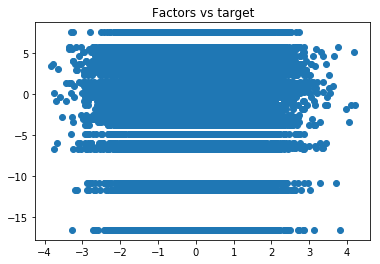

In [4]:
# Plot all the factors together vs the target value
allx = [el for col in x for el in x[col]]
ally = list(y[0]) * len(x.columns)

_, ax = plt.subplots()
ax.scatter(allx, ally)
ax.set_title("Factors vs target")

The quick analysis shows that the factors are already scaled

Since we have few data samples, we can use crossvalidation to test the data on different linear models and choose for the final regression the one that best fits our data.

In [5]:
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold
from sklearn import metrics

# using linear models beacause we already know that the function that we want to predict is linear
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    ElasticNet,
    Ridge,
    LassoCV,
)
from sklearn import svm

models = {
    "Linear regression": LinearRegression(fit_intercept=True, copy_X=True),
    "SVM regressor": svm.LinearSVR(fit_intercept=True),
    "Lasso": Lasso(fit_intercept=True),
    "ElasticNet": ElasticNet(fit_intercept=True),
    "Ridge": Ridge(fit_intercept=True),
}

k_fold = KFold(n_splits=5)
for name in models:
    scores = cross_val_score(
        models[name], x.values, y.values.ravel(), cv=k_fold, n_jobs=-1, scoring=metrics.make_scorer(metrics.r2_score)
    )
    print(f"{name} R2 score: {np.mean(scores):.3} (+/-{np.std(scores):.3})")

/Users/irisuky/anaconda3/envs/logmind/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
/Users/irisuky/anaconda3/envs/logmind/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
/Users/irisuky/anaconda3/envs/logmind/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' 

Linear regression R2 score: 0.0411 (+/-0.16)
SVM regressor R2 score: 0.0691 (+/-0.156)
Lasso R2 score: 0.925 (+/-0.0234)
ElasticNet R2 score: 0.759 (+/-0.0476)
Ridge R2 score: 0.0491 (+/-0.158)


Lasso shows better results on this dataset - and the result is consistent with different metrics. It's worth noting that we used the algorithms with their default values. Proper parameter tuning, for example with random search, can drastically improve the results.

However, we already have a nice regression with Lasso, so in this case, we will apply parameter tuning only on the selected algorithm.

In [6]:
# Optimize alpha parameter for Lasso (using cv)
model = LassoCV(fit_intercept=True, cv=5).fit(x.values, y.values.ravel())
alpha = model.alpha_
model.score(x, y)

0.9999723122473902

Perform final regression on the test set

In [7]:
# Fitting the formula y = ax + b on all the training set
final_regression_model = Lasso(alpha=alpha, fit_intercept=True).fit(
    x.values, y.values.ravel()
)
a = final_regression_model.coef_
b = final_regression_model.intercept_

In [8]:
from sklearn.metrics import r2_score, explained_variance_score
y_pred = final_regression_model.predict(x_test)

print(f"R2 score for the final model: {r2_score(y_test.values, y_pred):.4}")

R2 score for the final model: 0.9952


In [9]:
# Save the model
pickle.dump(
    final_regression_model, open("ex2.1.4 - final_regression_model.pkl", "wb")
)